# Importación de Librerías

## Para Extracción de Características

Desde la librería del proyecto, importamos las funciones más importantes para realizar el análisis exploratorio de los datos.

In [ ]:
# pyarrow might be needed to read the data
!python -m pip install Cython
!python -m pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
!python -m pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
!python -m pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
!python -m pip install pyarrow
!python -m pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining turbofats from git+https://****@github.com/alercebroker/turbo-fats#egg=turbofats
  Updating ./src/turbofats clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 0e8f0452ce1bcac69ee876c5598a0e1152374400
  Attempting uninstall: turbofats
    Found existing installation: turbofats 2.0.0
    Can't uninstall 'turbofats'. No files were found to uninstall.
  Running setup.py develop for turbofats
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining mhps from git+https://****@github.com/alercebroker/mhps#egg=mhps
  Updating ./src/mhps clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 7ace7dbaccd7026d69190265d91501fae5d2b1ca
  Attempting uninstall: mhps
    Found existing ins

In [ ]:
from lc_classifier.utils import LightcurveBuilder

In [ ]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor
from lc_classifier.features import SupernovaeDetectionFeatureExtractor
from lc_classifier.features import FeatureExtractorComposer
from lc_classifier.features import SNParametricModelExtractor

## Librerías Típicas

Librerías que estarán presentes a lo largo del trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funciones para el Análisis y Extracción de Características

Creamos una función que nos permite ver en general las características del dataset a trabajar, mostrando (por ejemplo) las primeras y últimas onbservaciones dentro del dataset, descripción numéricas, datos faltantes, entre otros.

In [ ]:
def exploratory_data_analysis(df_copy):
    print('1.- El df_copy tiene ', len(df_copy), 'filas y ', df_copy.shape[1], ' columnas')
    print('2.- El df_copy esta compuesto por las siguientes columnas:', list(df_copy.columns))
    print('3.- Ejemplos de filas del df_copy: \n'
          'Primeras 5 filas')
    display(df_copy.head(5))
    print('Últimas 5 filas:')
    display(df_copy.tail(5))
    print('Muestreo aleatorio de 5 filas:')
    display(df_copy.sample(5))
    print('4.- Descripción numérica del df_copy:')
    display(df_copy.describe())
    print('5.- Cantidad de valores nulos por columna:')
    display(df_copy.isna().sum())
    print('6.- Cantidad de valores únicos por columna:')
    display(df_copy.nunique())

In [ ]:
# fid = {1 2} Indica la banda a la que corresponde (green, red) 
bands = ['g', 'r']

feature_extractor = FeatureExtractorComposer(
    [   
        SupernovaeDetectionFeatureExtractor(bands),
        MHPSExtractor(bands),
        PeriodExtractor(bands),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands),
        SNParametricModelExtractor(bands)
    ]
)

#Comentar caracteristicas que usamos 

Las funciones para extraer las características son las mencionadas anteriormente, las cuales son aplicadas por cada una de las bandas presentes en el dataset, tomando para su procesamiento cada una de las características de todas las observaciones, devolviendo valores específicos para cada una de ellas. Las funciones presentes devuelven los siguientes valores:

* ``SupernovaeDetectionFeatureExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| delta_mag_fid      | Diferencia entre la máxima y mínima magnitud observada en una banda dada |
| delta_mjd_fid      | Intervalo de tiempo total de la curva de luz en una banda dada |
| first_mag          | magnitud de la primera alerta en una banda determinada |
| mean_mag           | magnitud máxima de la curva de luz de alerta en una banda dada |
| min_mag            | magnitud mínima de la curva de luz de alerta en una banda dada |
| n_det              | número de detecciones en la curva de luz de alerta de una banda determinada |
| n_neg              | número de detecciones negativas en la curva de luz de alerta (isdiffpos=-1) |
| n_pos              | número de detecciones positivas en la curva de luz de alerta (isdiffpos=+1) |
| positive_fraction  | Fracción de detecciones en las imágenes de diferencia de una banda determinada que son más brillantes que la imagen de la plantilla |

* ``MHPSExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| MHPS_ratio         | Relación entre las varianzas MHPS_low y MHPS_high para una banda dada |
| MHPS_low           | Varianza asociada con una escala de tiempo de 100 días obtenida de un análisis MHPS |
| MHPS_high          | Varianza asociada con una escala de tiempo de 10 días obtenida de un análisis MHPS |
| MHPS_non_zero      | Número de puntos en la curva de luz utilizados para el análisis MHPS |
| MHPS_PN_flag       | Indicador que informa si el ruido de Poisson es mayor que la varianza MHPS_high |

* ``PeriodExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| Multiband_period   | Único. Período obtenido mediante el periodograma MHAOV multibanda |
| PPE                | Único. Multiband Periodogram Pseudo Entropy |
| Period_band        | Período de banda única calculado usando un periodograma de análisis de varianza multiarmónico (MHAOV) |
| delta_period       | Valor absoluto de la diferencia entre el Multiband_period y el período MHAOV obtenido utilizando una sola banda |

* ``GPDRWExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| GP_DRW_sigma       | Amplitud de la variabilidad a escalas de tiempo cortas ($t << \tau$), a partir del modelado DRW |
| GP_DRW_tau         | Tiempo de relajación ($\tau$) del modelado DRW |

* ``FoldedKimExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| psi_cumsum         | Rango de una suma acumulativa aplicada a la curva de luz plegada en fase |
| psi_eta            | Índice Eta_e calculado a partir de la curva de luz plegada |

* ``HarmonicsExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| Harmonics_mag_1    | Amplitud de la 1ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_2    | Amplitud de la 2ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_3    | Amplitud de la 3ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_4    | Amplitud de la 4ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_5    | Amplitud de la 5ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_6    | Amplitud de la 6ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mag_7    | Amplitud de la 7ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_2  | Fase de la 2ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_3  | Fase de la 3ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_4  | Fase de la 4ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_5  | Fase de la 5ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_6  | Fase de la 6ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_phase_7  | Fase de la 7ª componente de la serie armónica (obtenida ajustando una serie armónica hasta la séptima armónica) |
| Harmonics_mse      | Error cuadrático medio de la serie de armónicos (obtenido ajustando una serie armónica hasta el séptimo armónico) |

* ``IQRExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| iqr                | Calcula el rango intercuartil de los datos a lo largo del eje especificado |

* ``PowerRateExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| Power_rate_1/4     | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para P/4 |
| Power_rate_1/3     | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para P/3 |
| Power_rate_1/2     | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para P/2 |
| Power_rate_2       | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para 2*P |
| Power_rate_3       | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para 3*P |
| Power_rate_4       | Único. Relación entre la potencia del periodograma multibanda obtenida para el mejor periodo candidato (P) y para 4*P |

* ``TurboFatsFeatureExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| Amplitude          | La mitad de la diferencia entre la mediana de las 5% máximas magnitudes y 5% mínimas |
| AndersonDarling    | Prueba de si una muestra de datos proviene de una población con una distribución específica (en este caso una distribución normal) |
| Autocor_length     | Valor de retraso donde la función de autocorrelación se vuelve más pequeña que Eta_e |
| Beyond1Std         | Porcentaje de puntos con mag fotométrico que se encuentran más allá de $1\sigma$ de la media |
| Con                | Número de tres puntos de datos consecutivos más brillantes/débiles que $2σ$ de la curva de luz |
| Eta_e              | Relación de la media de los cuadrados de las sucesivas diferencias de magnitud con la varianza de la curva de luz |
| Gskew              | Medida del sesgo basada en la mediana |
| MaxSlope           | Pendiente máxima de magnitud absoluta entre dos observaciones consecutivas |
| Mean               | Magnitud media de lc_corr (o media de lc_diff si la fuente no se puede corregir) |
| Meanvariance       | Relación entre la desviación estándar y la magnitud media |
| MedianAbsDev       | Discrepancia mediana de los datos de los datos medianos |
| MedianBRP          | Fracción de puntos fotométricos dentro de amplitud/10 de la mediana mag |
| PairSlopeTrend     | Fracción de primeras diferencias crecientes menos fracción de primeras diferencias decrecientes en las últimas 30 medidas de magnitud ordenadas por tiempo |
| PercentAmplitude   | Fracción de primeras diferencias crecientes menos fracción de primeras diferencias decrecientes en las últimas 30 medidas de magnitud ordenadas por tiempo |
| Q31                | Diferencia entre el 3er y el 1er cuartil de la curva de luz |
| Rcs                | Rango de una suma acumulada |
| Skew               | Medida de asimetría |
| SmallKurtosis      | Pequeña muestra de curtosis de las magnitudes |
| Std                | Desviación estándar de la curva de luz |
| StetsonK           | Medida robusta de curtosis |
| Pvar               | Probabilidad de que la fuente sea intrínsecamente variable |
| ExcessVar          | Medida de la amplitud de la variabilidad intrínseca \[(Std - error fotométrico promedio)/Media\] |
| SF_ML_amplitude    | Diferencia de magnitud Rms de la función de estructura, calculada en una escala de tiempo de 1 año |
| SF_ML_gamma        | Gradiente logarítmico del cambio medio en magnitud (calculado a partir de la función de estructura) |
| IAR_phi            | Nivel de autocorrelación utilizando una representación en tiempo discreto de un modelo DRW |
| LinearTrend        | Pendiente de un ajuste lineal a la curva de luz |

* ``SNParametricModelExtractor``:

|   Característica   | Descripción |
|--------------------|:------------|
| SPM_A              | Supernova parametric model  A |
| SPM_t0             | Supernova parametric model t0 |
| SPM_gamma          | Supernova parametric model gamma |
| SPM_beta           | Supernova parametric model beta |
| SPM_tau_rise       | Supernova parametric model rise time |
| SPM_tau_fall       | Supernova parametric model fall time |
| SPM_chi            | Supernova parametric model reduced chi2 of the light curve fit |

# Importación de Datos y Análisis Exploratorio

## Dataset "detections_SNe_v7.0.1.csv"

Se importa el primer dataset, el cual contiene la información sobre las detecciones de supernovas y sus características al momento de medirlas.

In [ ]:
path1 = '/content/drive/MyDrive/Proyecto Inteligencia Computacional/Datos/detections_SNe_v7.0.1.csv'
detections = pd.read_csv(path1)

In [ ]:
exploratory_data_analysis(detections)

1.- El df_copy tiene  128718 filas y  32  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['Unnamed: 0', 'objectId', 'fid', 'isdiffpos', 'sigmapsf', 'field', 'fwhm', 'dec', 'magpsf', 'rcid', 'ra', 'sky', 'rb', 'ssmagnr', 'distpsnr3', 'sgscore2', 'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb', 'sgscore3', 'neargaia', 'sgscore1', 'mjd', 'corrected', 'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext', 'dubious', 'has_stamp']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,...,sgscore3,neargaia,sgscore1,mjd,corrected,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,dubious,has_stamp
0,0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,...,0.5,78.019280,0.175976,58991.302095,False,NaN,NaN,NaN,False,True
1,1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,...,0.5,78.022800,0.175976,59000.260914,False,NaN,NaN,NaN,False,True
2,2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,...,0.5,78.111310,0.175976,59004.192674,False,NaN,NaN,NaN,False,True
3,3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,...,0.5,78.077545,0.175976,59021.227604,False,NaN,NaN,NaN,False,True
4,4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,...,0.5,78.083150,0.175976,58986.223646,False,NaN,NaN,NaN,False,True


Últimas 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,...,sgscore3,neargaia,sgscore1,mjd,corrected,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,dubious,has_stamp
128713,128713,ZTF19abhduuo,2,1.0,0.110306,348,2.32,-9.584920,19.317352,35,...,0.16369,87.246700,0.5,58735.377546,False,NaN,NaN,NaN,False,True
128714,128714,ZTF19abhduuo,2,1.0,0.057063,348,2.81,-9.584937,18.340456,35,...,0.16369,87.167080,0.5,58692.485035,False,NaN,NaN,NaN,False,True
128715,128715,ZTF19abhduuo,2,1.0,0.064045,348,1.86,-9.584880,18.389997,35,...,0.16369,87.379220,0.5,58695.462998,False,NaN,NaN,NaN,False,True
128716,128716,ZTF19abhduuo,2,1.0,0.075199,348,3.45,-9.584910,18.560564,35,...,0.16369,87.234886,0.5,58704.480220,False,NaN,NaN,NaN,False,True
128717,128717,ZTF19abhduuo,2,1.0,0.103586,348,2.03,-9.584880,18.914570,35,...,0.16369,87.371070,0.5,58726.383102,False,NaN,NaN,NaN,False,True


Muestreo aleatorio de 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,...,sgscore3,neargaia,sgscore1,mjd,corrected,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,dubious,has_stamp
46430,46430,ZTF19aawethd,1,1.0,0.119035,491,2.84,6.683156,18.842546,54,...,0.311583,11.138426,0.000000,58712.204907,False,NaN,NaN,NaN,False,True
72166,72166,ZTF20aavrzha,1,1.0,0.026862,824,2.74,62.826905,16.054918,34,...,0.296860,37.376350,0.500000,58971.426285,True,15.996158,0.024981,0.025447,False,True
109322,109322,ZTF19aadnxnl,2,1.0,0.040596,1756,1.87,44.766282,16.167294,39,...,0.500000,54.955307,0.190631,58582.229433,False,NaN,NaN,NaN,False,True
67057,67057,ZTF19aavhzsc,2,1.0,0.048308,821,1.87,64.383518,18.323078,50,...,-999.000000,8.218595,0.936125,58660.227361,False,NaN,NaN,NaN,False,True
89338,89338,ZTF18acbzojv,1,1.0,0.237225,668,2.58,36.599716,19.631700,57,...,NaN,NaN,NaN,58461.461921,False,NaN,NaN,NaN,False,True


4.- Descripción numérica del df_copy:


,Unnamed: 0,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,ra,...,maggaia,exptime,drb,sgscore3,neargaia,sgscore1,mjd,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
count,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,...,106313.000000,106313.000000,106313.000000,106313.000000,106313.000000,106313.000000,128718.000000,51027.000000,51027.000000,51027.000000
mean,64358.500000,1.558143,0.952532,0.125902,667.375542,2.576412,33.346893,18.878757,31.950823,192.043778,...,-0.461552,27.791333,0.701059,-38.352699,4.301076,-1.299304,58748.603398,18.568707,24.803780,0.439816
std,37157.830312,0.496610,0.304440,0.069462,185.518249,1.003749,23.740082,1.000839,19.094646,94.077126,...,135.280722,7.834690,0.454825,193.058182,137.094411,39.336763,201.812652,4.697692,43.077781,5.756002
min,0.000000,1.000000,-1.000000,0.005089,245.000000,0.974933,-27.861834,12.571620,0.000000,0.339991,...,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,58242.310799,13.490454,0.000089,0.002464
25%,32179.250000,1.000000,1.000000,0.073199,567.000000,2.000000,16.607410,18.305296,15.000000,136.032766,...,17.185322,30.000000,0.000000,0.048452,8.112282,0.015708,58622.172801,17.594404,0.055398,0.037891
50%,64358.500000,2.000000,1.000000,0.109468,681.000000,2.350000,35.577004,18.964634,33.000000,208.511379,...,18.540829,30.000000,0.999899,0.500000,17.330488,0.132845,58762.150139,18.347572,0.098933,0.063813
75%,96537.750000,2.000000,1.000000,0.164466,783.000000,2.890000,51.525269,19.579517,48.000000,258.104078,...,19.561750,30.000000,0.999997,0.607167,33.234410,0.500000,58899.308756,19.033655,2.385939,0.104793
max,128717.000000,2.000000,1.000000,0.864390,1845.000000,20.160000,84.787089,21.618700,63.000000,359.752382,...,21.214579,30.000000,1.000000,1.000000,88.977760,1.000000,59107.340023,100.000000,146.011942,169.378872


5.- Cantidad de valores nulos por columna:


Unnamed: 0               0
objectId                 0
fid                      0
isdiffpos                0
sigmapsf                 0
field                    0
fwhm                     0
dec                      0
magpsf                   0
rcid                     0
ra                       0
sky                      0
rb                       0
ssmagnr              22373
distpsnr3            22405
sgscore2             22405
maggaiabright        22405
distpsnr2            22405
distpsnr1            22405
maggaia              22405
exptime              22405
drb                  22405
sgscore3             22405
neargaia             22405
sgscore1             22405
mjd                      0
corrected                0
magpsf_corr          77691
sigmapsf_corr        77691
sigmapsf_corr_ext    77691
dubious                  0
has_stamp                0
dtype: int64

6.- Cantidad de valores únicos por columna:


Unnamed: 0           128718
objectId               2068
fid                       2
isdiffpos                 2
sigmapsf              66753
field                   607
fwhm                   1883
dec                   64019
magpsf                63797
rcid                     64
ra                    64765
sky                   66907
rb                     1453
ssmagnr                  43
distpsnr3             53267
sgscore2               1171
maggaiabright           593
distpsnr2             54967
distpsnr1             55370
maggaia                2023
exptime                   2
drb                   11009
sgscore3               1169
neargaia              52880
sgscore1               1123
mjd                   47201
corrected                 2
magpsf_corr           26592
sigmapsf_corr         20000
sigmapsf_corr_ext     26601
dubious                   2
has_stamp                 2
dtype: int64

In [ ]:
detections["mjd"]

0         58991.302095
1         59000.260914
2         59004.192674
3         59021.227604
4         58986.223646
              ...     
128713    58735.377546
128714    58692.485035
128715    58695.462998
128716    58704.480220
128717    58726.383102
Name: mjd, Length: 128718, dtype: float64

In [ ]:
for d in detections.columns:
  print('-----------------------------------------------------------')
  print('-----------------------------------------------------------')
  print(d)
  print(detections[d].unique())





-----------------------------------------------------------
-----------------------------------------------------------
Unnamed: 0
[     0      1      2 ... 128715 128716 128717]
-----------------------------------------------------------
-----------------------------------------------------------
objectId
['ZTF18aahvndq' 'ZTF19abqviuy' 'ZTF19acyogrm' ... 'ZTF19abpnsck'
 'ZTF18ablqqqp' 'ZTF19abhduuo']
-----------------------------------------------------------
-----------------------------------------------------------
fid
[1 2]
-----------------------------------------------------------
-----------------------------------------------------------
isdiffpos
[ 1. -1.]
-----------------------------------------------------------
-----------------------------------------------------------
sigmapsf
[0.02879123 0.03123145 0.03216098 ... 0.06404468 0.07519885 0.10358618]
-----------------------------------------------------------
-----------------------------------------------------------
fiel

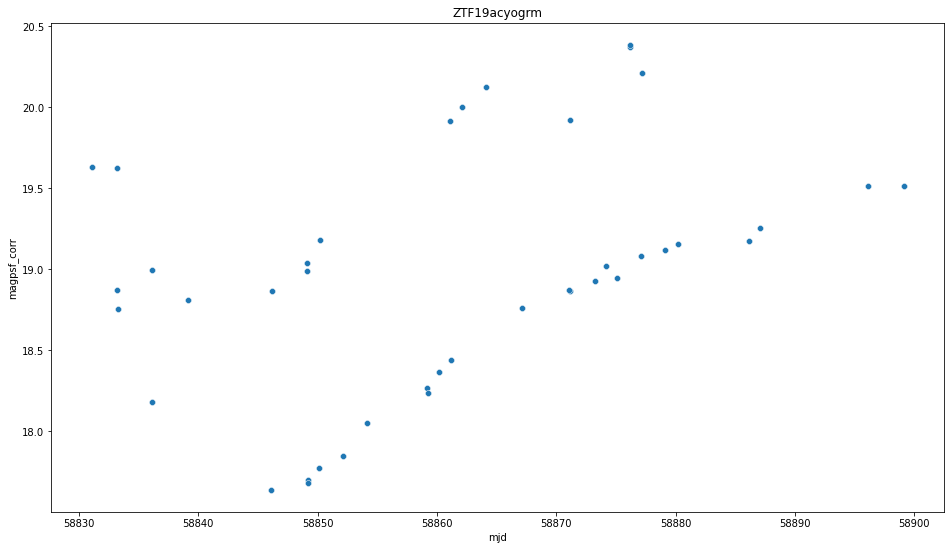

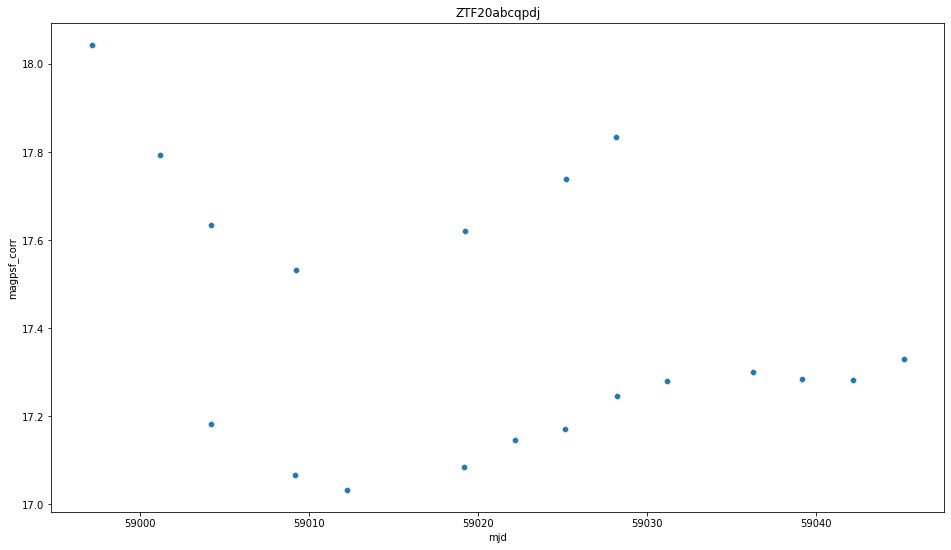

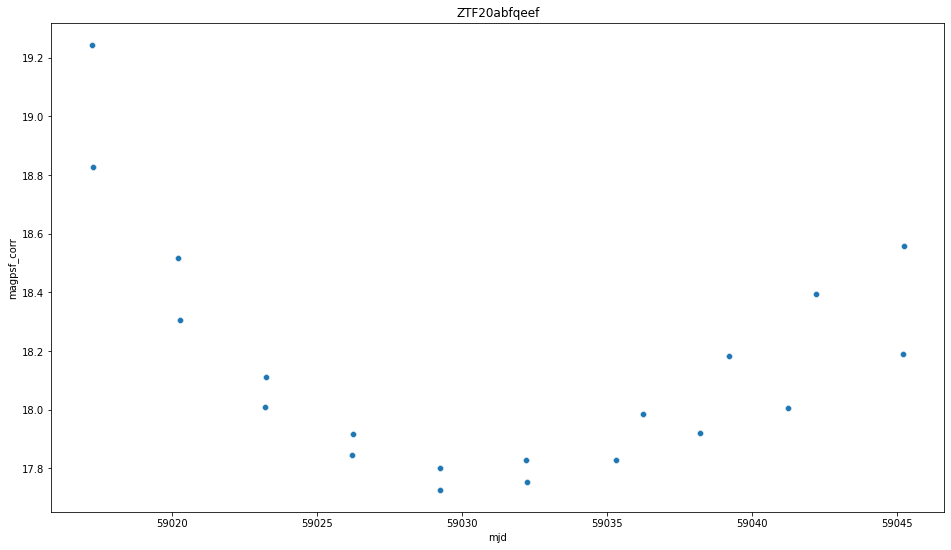

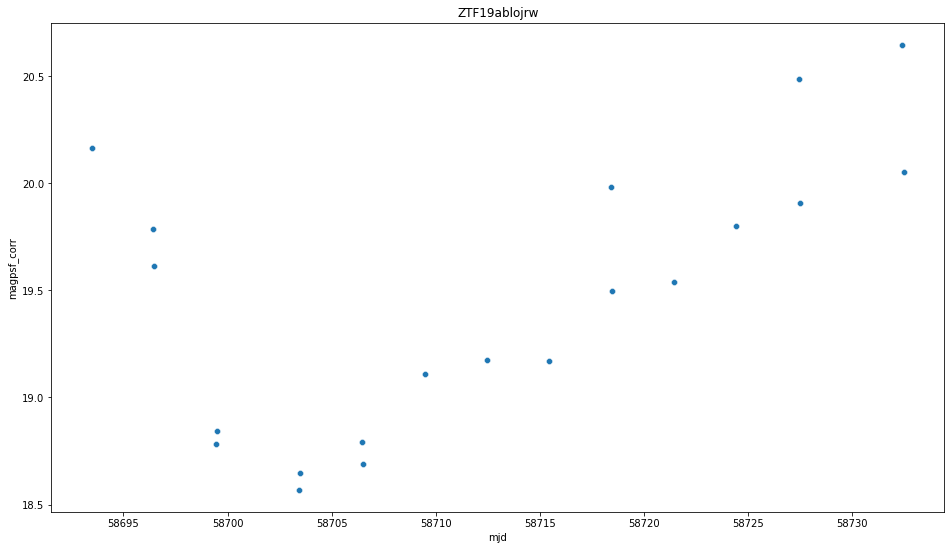

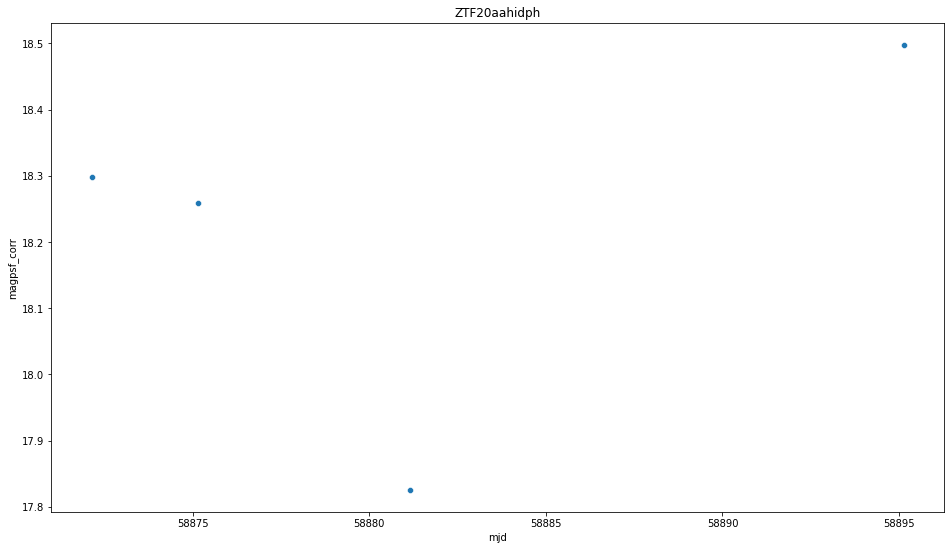

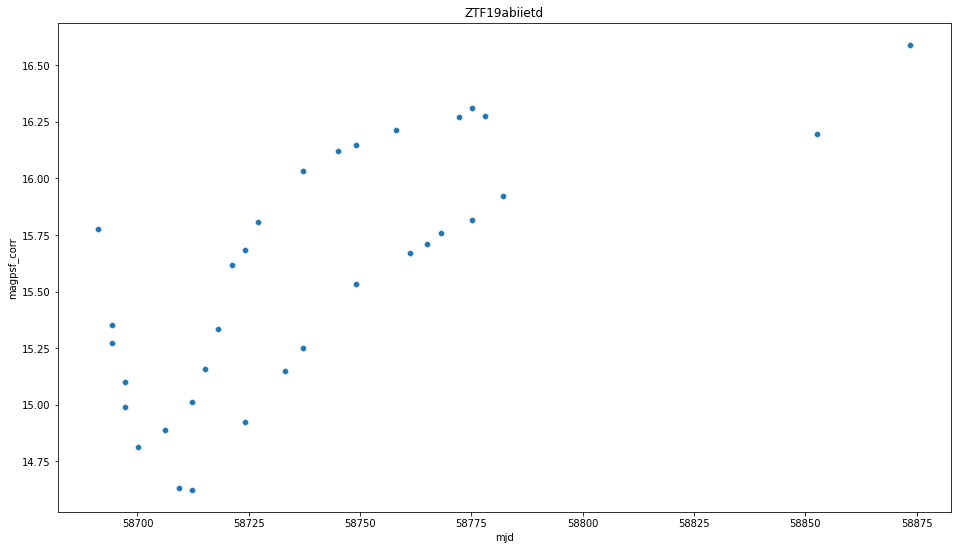

In [ ]:
import seaborn as sns
df_test = pd.DataFrame()
df_test["objectId"] = detections["objectId"]
df_test["mjd"] = detections["mjd"]
df_test["magpsf_corr"] = detections["magpsf_corr"]

df_test = df_test.dropna()

objs = ['ZTF19acyogrm', 'ZTF20abcqpdj', 'ZTF20abfqeef',
       'ZTF19ablojrw', 'ZTF20aahidph', 'ZTF19abiietd']

#df_test = df_test[df_test['objectId']=='ZTF19acyogrm']


for obj in objs:
    plt.figure(figsize=(16,9))
    plt.title(obj)
    sns.scatterplot(data = df_test[df_test['objectId']== obj], x = "mjd", y = "magpsf_corr")



In [ ]:
detections.dtypes

Unnamed: 0             int64
objectId              object
fid                    int64
isdiffpos            float64
sigmapsf             float64
field                  int64
fwhm                 float64
dec                  float64
magpsf               float64
rcid                   int64
ra                   float64
sky                  float64
rb                   float64
ssmagnr              float64
distpsnr3            float64
sgscore2             float64
maggaiabright        float64
distpsnr2            float64
distpsnr1            float64
maggaia              float64
exptime              float64
drb                  float64
sgscore3             float64
neargaia             float64
sgscore1             float64
mjd                  float64
corrected               bool
magpsf_corr          float64
sigmapsf_corr        float64
sigmapsf_corr_ext    float64
dubious                 bool
has_stamp               bool
dtype: object

<AxesSubplot:>

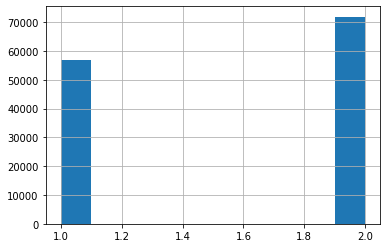

In [ ]:
detections['fid'].hist()

## Dataset "dfcrossmatches_prioritized_v7.0.1.csv"

In [ ]:
path2 = '/content/drive/MyDrive/Proyecto Inteligencia Computacional/Datos/dfcrossmatches_prioritized_v7.0.1.csv'
df = pd.read_csv(path2)

In [ ]:
exploratory_data_analysis(df)

1.- El df_copy tiene  173879 filas y  9  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['oid', 'classALeRCE', 'ra', 'dec', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
0,ZTF19abegncu,AGN,357.296363,-8.941186,NaN,Oh2015,5.8772718059579e+17,AGN_galaxy_dominated,0.243081
1,ZTF18acejdhu,AGN,11.958444,-10.496615,NaN,Oh2015,5.877272256953059e+17,AGN_galaxy_dominated,0.301126
2,ZTF18acdzene,AGN,17.478620,-10.110250,NaN,Oh2015,5.877271789938934e+17,AGN_galaxy_dominated,0.158643
3,ZTF18abwzuzw,AGN,25.038255,-10.352430,NaN,Oh2015,5.877272294485526e+17,AGN_galaxy_dominated,0.485322
4,ZTF19abmposz,AGN,26.670031,-8.354787,NaN,Oh2015,5.877271806085038e+17,AGN_galaxy_dominated,0.213990


Últimas 5 filas:


,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
173874,ZTF18abikbvc,LPV,286.720222,24.733440,NaN,GAIADR2VS,4.533629080944307e+18,MIRA_SR,0.299487
173875,ZTF19aamtoyb,LPV,99.257590,-15.567786,NaN,GAIADR2VS,2.9501070744892713e+18,MIRA_SR,0.299597
173876,ZTF19abeesgk,LPV,277.499222,-27.002742,NaN,GAIADR2VS,4.0518162825206625e+18,MIRA_SR,0.299766
173877,ZTF18abnubuy,LPV,292.053754,38.418277,NaN,GAIADR2VS,2.0526959231045647e+18,MIRA_SR,0.299777
173878,ZTF18abgqxlw,LPV,280.809676,12.634607,330.8572533,GAIADR2VS,4.505379156900003e+18,MIRA_SR,0.119874


Muestreo aleatorio de 5 filas:


,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
14769,ZTF18aabeydj,EA,46.209304,22.358645,5.90432,CRTSnorth,1121016051328.0,EA,0.362392
70439,ZTF18abxnqxi,NLQSO,349.816962,15.422912,NaN,MILLIQUAS,SDSS J231916.07+152522.6,N,0.273495
122310,ZTF20aammfap,RRL,200.715857,-25.090197,0.394112,CRTSsouth,3025091023488.0,RRc,1.356300
107818,ZTF19aascjrr,QSO,227.888137,29.495898,NaN,MILLIQUAS,SDSS J151133.16+292945.2,Q,0.236410
63435,ZTF19aabiqzd,EB/EW,111.528731,-11.635454,1.4171331,ASASSN,ASASSN-V J072606.90-113807.5,EB,0.267285


4.- Descripción numérica del df_copy:


,ra,dec,separation_arcsec
count,173879.000000,173879.000000,173879.000000
mean,196.135132,17.932498,0.401967
std,94.621196,25.493272,0.410766
min,0.000649,-27.984148,0.000130
25%,124.344190,-1.965855,0.106469
50%,206.858899,18.665501,0.250464
75%,269.982558,37.274331,0.557480
max,359.999626,87.888626,1.999216


5.- Cantidad de valores nulos por columna:


oid                      0
classALeRCE              0
ra                       0
dec                      0
period               81196
source                   0
id_source                0
class_source             0
separation_arcsec        0
dtype: int64

6.- Cantidad de valores únicos por columna:


oid                  173879
classALeRCE              23
ra                   173879
dec                  173878
period                65022
source                   11
id_source            151134
class_source            101
separation_arcsec    173879
dtype: int64

<AxesSubplot:xlabel='classALeRCE', ylabel='Count'>

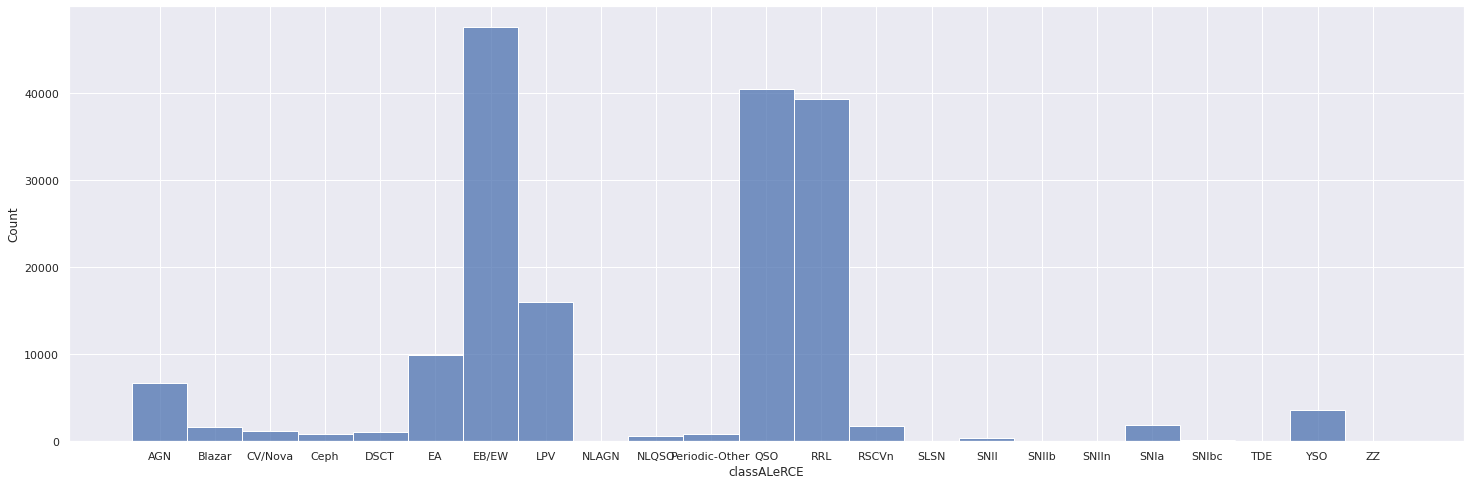

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(25,8)})
sns.histplot(df['classALeRCE'])

In [ ]:
df['classALeRCE'].unique()

array(['AGN', 'Blazar', 'CV/Nova', 'Ceph', 'DSCT', 'EA', 'EB/EW', 'LPV',
       'NLAGN', 'NLQSO', 'Periodic-Other', 'QSO', 'RRL', 'RSCVn', 'SLSN',
       'SNII', 'SNIIb', 'SNIIn', 'SNIa', 'SNIbc', 'TDE', 'YSO', 'ZZ'],
      dtype=object)

# Extracción Características de los Datasets

Ambos dataset presentan diferentes onservaciones para las mismas supernovas, por lo que se hace un merge para centralizar todos los datos:

In [ ]:
#Extraemos las features de detections
from scipy import stats

df_final = pd.merge(detections, df, left_on='objectId', right_on='oid', how='inner')
#Revisar 
exploratory_data_analysis(df_final)


1.- El df_copy tiene  128718 filas y  41  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['Unnamed: 0', 'objectId', 'fid', 'isdiffpos', 'sigmapsf', 'field', 'fwhm', 'dec_x', 'magpsf', 'rcid', 'ra_x', 'sky', 'rb', 'ssmagnr', 'distpsnr3', 'sgscore2', 'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb', 'sgscore3', 'neargaia', 'sgscore1', 'mjd', 'corrected', 'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext', 'dubious', 'has_stamp', 'oid', 'classALeRCE', 'ra_y', 'dec_y', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,has_stamp,oid,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
0,0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,...,True,ZTF18aahvndq,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
1,1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,...,True,ZTF18aahvndq,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
2,2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,...,True,ZTF18aahvndq,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
3,3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,...,True,ZTF18aahvndq,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
4,4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,...,True,ZTF18aahvndq,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069


Últimas 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,has_stamp,oid,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
128713,128713,ZTF19abhduuo,2,1.0,0.110306,348,2.32,-9.584920,19.317352,35,...,True,ZTF19abhduuo,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
128714,128714,ZTF19abhduuo,2,1.0,0.057063,348,2.81,-9.584937,18.340456,35,...,True,ZTF19abhduuo,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
128715,128715,ZTF19abhduuo,2,1.0,0.064045,348,1.86,-9.584880,18.389997,35,...,True,ZTF19abhduuo,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
128716,128716,ZTF19abhduuo,2,1.0,0.075199,348,3.45,-9.584910,18.560564,35,...,True,ZTF19abhduuo,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
128717,128717,ZTF19abhduuo,2,1.0,0.103586,348,2.03,-9.584880,18.914570,35,...,True,ZTF19abhduuo,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343


Muestreo aleatorio de 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,has_stamp,oid,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
76335,76335,ZTF19abqrrto,2,1.0,0.152534,700,2.53,40.165671,19.667600,20,...,True,ZTF19abqrrto,SNIa,55.803724,40.165596,NaN,TNS,SN 2019oci,SN Ia-91T-like,0.117676
48547,48547,ZTF19abqykei,2,1.0,0.077097,354,2.99,-10.372277,18.812717,21,...,True,ZTF19abqykei,SNIIb,69.092686,-10.372238,NaN,TNS,SN 2019obh,SN IIb,0.036258
90097,90097,ZTF18aawurud,2,1.0,0.086949,765,2.34,50.659324,18.578500,57,...,True,ZTF18aawurud,SNIa,280.730066,50.659339,NaN,TNS,SN 2018eaz,SN Ia,0.042316
32604,32604,ZTF19abqrhvy,1,1.0,0.061436,645,2.15,27.571827,18.072584,32,...,True,ZTF19abqrhvy,SNII,342.186213,27.571828,NaN,TNS,SN 2019odf,SN II,0.032226
42166,42166,ZTF19aalzmmt,2,1.0,0.073732,581,2.13,21.374461,18.065222,50,...,True,ZTF19aalzmmt,SNIa,226.406840,21.374460,NaN,TNS,SN 2019bky,SN Ia-91T-like,0.186708


4.- Descripción numérica del df_copy:


,Unnamed: 0,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,ra_x,...,sgscore3,neargaia,sgscore1,mjd,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,ra_y,dec_y,separation_arcsec
count,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,...,106313.000000,106313.000000,106313.000000,128718.000000,51027.000000,51027.000000,51027.000000,128718.000000,128718.000000,128718.000000
mean,64358.500000,1.558143,0.952532,0.125902,667.375542,2.576412,33.346893,18.878757,31.950823,192.043778,...,-38.352699,4.301076,-1.299304,58748.603398,18.568707,24.803780,0.439816,192.043776,33.346894,0.117648
std,37157.830312,0.496610,0.304440,0.069462,185.518249,1.003749,23.740082,1.000839,19.094646,94.077126,...,193.058182,137.094411,39.336763,201.812652,4.697692,43.077781,5.756002,94.077124,23.740082,0.107090
min,0.000000,1.000000,-1.000000,0.005089,245.000000,0.974933,-27.861834,12.571620,0.000000,0.339991,...,-999.000000,-999.000000,-999.000000,58242.310799,13.490454,0.000089,0.002464,0.340093,-27.861773,0.001958
25%,32179.250000,1.000000,1.000000,0.073199,567.000000,2.000000,16.607410,18.305296,15.000000,136.032766,...,0.048452,8.112282,0.015708,58622.172801,17.594404,0.055398,0.037891,136.032754,16.607428,0.049078
50%,64358.500000,2.000000,1.000000,0.109468,681.000000,2.350000,35.577004,18.964634,33.000000,208.511379,...,0.500000,17.330488,0.132845,58762.150139,18.347572,0.098933,0.063813,208.511338,35.576987,0.085808
75%,96537.750000,2.000000,1.000000,0.164466,783.000000,2.890000,51.525269,19.579517,48.000000,258.104078,...,0.607167,33.234410,0.500000,58899.308756,19.033655,2.385939,0.104793,258.104114,51.525169,0.149841
max,128717.000000,2.000000,1.000000,0.864390,1845.000000,20.160000,84.787089,21.618700,63.000000,359.752382,...,1.000000,88.977760,1.000000,59107.340023,100.000000,146.011942,169.378872,359.751892,84.786970,0.693618


5.- Cantidad de valores nulos por columna:


Unnamed: 0                0
objectId                  0
fid                       0
isdiffpos                 0
sigmapsf                  0
field                     0
fwhm                      0
dec_x                     0
magpsf                    0
rcid                      0
ra_x                      0
sky                       0
rb                        0
ssmagnr               22373
distpsnr3             22405
sgscore2              22405
maggaiabright         22405
distpsnr2             22405
distpsnr1             22405
maggaia               22405
exptime               22405
drb                   22405
sgscore3              22405
neargaia              22405
sgscore1              22405
mjd                       0
corrected                 0
magpsf_corr           77691
sigmapsf_corr         77691
sigmapsf_corr_ext     77691
dubious                   0
has_stamp                 0
oid                       0
classALeRCE               0
ra_y                      0
dec_y               

6.- Cantidad de valores únicos por columna:


Unnamed: 0           128718
objectId               2068
fid                       2
isdiffpos                 2
sigmapsf              66753
field                   607
fwhm                   1883
dec_x                 64019
magpsf                63797
rcid                     64
ra_x                  64765
sky                   66907
rb                     1453
ssmagnr                  43
distpsnr3             53267
sgscore2               1171
maggaiabright           593
distpsnr2             54967
distpsnr1             55370
maggaia                2023
exptime                   2
drb                   11009
sgscore3               1169
neargaia              52880
sgscore1               1123
mjd                   47201
corrected                 2
magpsf_corr           26592
sigmapsf_corr         20000
sigmapsf_corr_ext     26601
dubious                   2
has_stamp                 2
oid                    2068
classALeRCE               6
ra_y                   2068
dec_y               

In [ ]:
df_final = df_final.set_index('oid')
df_features = df_final.copy()
#df_features = df_final.rename(columns={'magpsf':'magnitude','mjd':'time', 'fid':'band','sigmapsf':'error'})

Se reemplazan los valores numéricos por las iniciales de las bandas correspondientes (g: green, r: red)

In [ ]:
exploratory_data_analysis(df_features)

1.- El df_copy tiene  128718 filas y  40  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['Unnamed: 0', 'objectId', 'fid', 'isdiffpos', 'sigmapsf', 'field', 'fwhm', 'dec_x', 'magpsf', 'rcid', 'ra_x', 'sky', 'rb', 'ssmagnr', 'distpsnr3', 'sgscore2', 'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb', 'sgscore3', 'neargaia', 'sgscore1', 'mjd', 'corrected', 'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext', 'dubious', 'has_stamp', 'classALeRCE', 'ra_y', 'dec_y', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aahvndq,0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069


Últimas 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abhduuo,128713,ZTF19abhduuo,2,1.0,0.110306,348,2.32,-9.584920,19.317352,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128714,ZTF19abhduuo,2,1.0,0.057063,348,2.81,-9.584937,18.340456,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128715,ZTF19abhduuo,2,1.0,0.064045,348,1.86,-9.584880,18.389997,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128716,ZTF19abhduuo,2,1.0,0.075199,348,3.45,-9.584910,18.560564,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128717,ZTF19abhduuo,2,1.0,0.103586,348,2.03,-9.584880,18.914570,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343


Muestreo aleatorio de 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abjarhj,11977,ZTF19abjarhj,1,1.0,0.069769,601,2.01,25.305553,18.747272,28,...,False,True,SNIa,5.800484,25.305538,NaN,TNS,SN 2019mfn,SN Ia-91T-like,0.119512
ZTF18abpaywm,110993,ZTF18abpaywm,2,1.0,0.275068,765,1.89,49.816114,18.543300,62,...,False,True,SNIa,277.889373,49.816104,NaN,TNS,SN 2018fne,SN Ia,0.097586
ZTF20aaxndzx,110063,ZTF20aaxndzx,1,1.0,0.131090,828,2.33,63.537599,19.445604,45,...,False,True,SNIa,291.991383,63.537600,NaN,TNS,SN 2020izx,SN Ia,0.094602
ZTF18acbwaxk,38566,ZTF18acbwaxk,2,1.0,0.028851,819,2.36,58.314127,16.073470,3,...,False,True,SNII,186.550268,58.314159,NaN,TNS,SN 2018hna,SN II,0.340104
ZTF18aaizerg,25993,ZTF18aaizerg,2,1.0,0.132778,759,2.95,50.102740,19.364115,62,...,False,True,SNIa,219.698243,50.102726,NaN,TNS,SN 2019zbj,SN Ia,0.058173


4.- Descripción numérica del df_copy:


,Unnamed: 0,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,ra_x,...,sgscore3,neargaia,sgscore1,mjd,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,ra_y,dec_y,separation_arcsec
count,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,...,106313.000000,106313.000000,106313.000000,128718.000000,51027.000000,51027.000000,51027.000000,128718.000000,128718.000000,128718.000000
mean,64358.500000,1.558143,0.952532,0.125902,667.375542,2.576412,33.346893,18.878757,31.950823,192.043778,...,-38.352699,4.301076,-1.299304,58748.603398,18.568707,24.803780,0.439816,192.043776,33.346894,0.117648
std,37157.830312,0.496610,0.304440,0.069462,185.518249,1.003749,23.740082,1.000839,19.094646,94.077126,...,193.058182,137.094411,39.336763,201.812652,4.697692,43.077781,5.756002,94.077124,23.740082,0.107090
min,0.000000,1.000000,-1.000000,0.005089,245.000000,0.974933,-27.861834,12.571620,0.000000,0.339991,...,-999.000000,-999.000000,-999.000000,58242.310799,13.490454,0.000089,0.002464,0.340093,-27.861773,0.001958
25%,32179.250000,1.000000,1.000000,0.073199,567.000000,2.000000,16.607410,18.305296,15.000000,136.032766,...,0.048452,8.112282,0.015708,58622.172801,17.594404,0.055398,0.037891,136.032754,16.607428,0.049078
50%,64358.500000,2.000000,1.000000,0.109468,681.000000,2.350000,35.577004,18.964634,33.000000,208.511379,...,0.500000,17.330488,0.132845,58762.150139,18.347572,0.098933,0.063813,208.511338,35.576987,0.085808
75%,96537.750000,2.000000,1.000000,0.164466,783.000000,2.890000,51.525269,19.579517,48.000000,258.104078,...,0.607167,33.234410,0.500000,58899.308756,19.033655,2.385939,0.104793,258.104114,51.525169,0.149841
max,128717.000000,2.000000,1.000000,0.864390,1845.000000,20.160000,84.787089,21.618700,63.000000,359.752382,...,1.000000,88.977760,1.000000,59107.340023,100.000000,146.011942,169.378872,359.751892,84.786970,0.693618


5.- Cantidad de valores nulos por columna:


Unnamed: 0                0
objectId                  0
fid                       0
isdiffpos                 0
sigmapsf                  0
field                     0
fwhm                      0
dec_x                     0
magpsf                    0
rcid                      0
ra_x                      0
sky                       0
rb                        0
ssmagnr               22373
distpsnr3             22405
sgscore2              22405
maggaiabright         22405
distpsnr2             22405
distpsnr1             22405
maggaia               22405
exptime               22405
drb                   22405
sgscore3              22405
neargaia              22405
sgscore1              22405
mjd                       0
corrected                 0
magpsf_corr           77691
sigmapsf_corr         77691
sigmapsf_corr_ext     77691
dubious                   0
has_stamp                 0
classALeRCE               0
ra_y                      0
dec_y                     0
period              

6.- Cantidad de valores únicos por columna:


Unnamed: 0           128718
objectId               2068
fid                       2
isdiffpos                 2
sigmapsf              66753
field                   607
fwhm                   1883
dec_x                 64019
magpsf                63797
rcid                     64
ra_x                  64765
sky                   66907
rb                     1453
ssmagnr                  43
distpsnr3             53267
sgscore2               1171
maggaiabright           593
distpsnr2             54967
distpsnr1             55370
maggaia                2023
exptime                   2
drb                   11009
sgscore3               1169
neargaia              52880
sgscore1               1123
mjd                   47201
corrected                 2
magpsf_corr           26592
sigmapsf_corr         20000
sigmapsf_corr_ext     26601
dubious                   2
has_stamp                 2
classALeRCE               6
ra_y                   2068
dec_y                  2068
period              

In [ ]:
df_features

,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aahvndq,0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF19abhduuo,128713,ZTF19abhduuo,2,1.0,0.110306,348,2.32,-9.584920,19.317352,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128714,ZTF19abhduuo,2,1.0,0.057063,348,2.81,-9.584937,18.340456,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128715,ZTF19abhduuo,2,1.0,0.064045,348,1.86,-9.584880,18.389997,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343


In [ ]:
df_features['class_source'].isna().sum() == 0

True

In [ ]:
df_features = df_features.reset_index()

In [ ]:
dff = df_features.groupby('oid').mean()
dff = dff.reset_index()

In [ ]:
var_nan = ['oid',
'ssmagnr',
'distpsnr3',
'sgscore2',
'maggaiabright',
'distpsnr2',
'distpsnr1',
'maggaia',
'exptime',
'drb',
'sgscore3',
'neargaia',
'sgscore1',
'magpsf_corr',
'sigmapsf_corr',
'sigmapsf_corr_ext']

df_nan = df_features[var_nan]



In [ ]:
dff.isna().sum()

oid                    0
Unnamed: 0             0
fid                    0
isdiffpos              0
sigmapsf               0
field                  0
fwhm                   0
dec_x                  0
magpsf                 0
rcid                   0
ra_x                   0
sky                    0
rb                     0
ssmagnr                0
distpsnr3              0
sgscore2               0
maggaiabright          0
distpsnr2              0
distpsnr1              0
maggaia                0
exptime                0
drb                    0
sgscore3               0
neargaia               0
sgscore1               0
mjd                    0
corrected              0
magpsf_corr          906
sigmapsf_corr        906
sigmapsf_corr_ext    906
dubious                0
has_stamp              0
ra_y                   0
dec_y                  0
separation_arcsec      0
dtype: int64

In [ ]:
j = 'ZTF20abgdtmv'
df_nan = df_nan[df_nan['oid'] == j]
df_nan.nunique()

oid                   1
ssmagnr               1
distpsnr3            26
sgscore2              1
maggaiabright         1
distpsnr2            26
distpsnr1            26
maggaia               1
exptime               1
drb                  24
sgscore3              1
neargaia             26
sgscore1              1
magpsf_corr           0
sigmapsf_corr         0
sigmapsf_corr_ext     0
dtype: int64

In [ ]:
j = 'ZTF20abgdtmv'
df_nan = df_nan[df_nan['oid'] == j]

for i in df_nan:
      if (df_nan[i].isna().sum() > 0) and i != 'period':
          promedio = df_nan[i].mean()
          df_nan[i] = df_nan[i].fillna(value = promedio)

          #print('Vamos en la estrella:', j ,'En la variable:' , i,'su promedio es:', promedio )

In [ ]:
df_nan.nunique()

oid                   1
ssmagnr               1
distpsnr3            27
sgscore2              1
maggaiabright         1
distpsnr2            27
distpsnr1            27
maggaia               1
exptime               1
drb                  25
sgscore3              2
neargaia             27
sgscore1              2
magpsf_corr           0
sigmapsf_corr         0
sigmapsf_corr_ext     0
dtype: int64

In [ ]:
df_nan.isna().sum()

oid                   0
ssmagnr               0
distpsnr3             0
sgscore2              0
maggaiabright         0
distpsnr2             0
distpsnr1             0
maggaia               0
exptime               0
drb                   0
sgscore3              0
neargaia              0
sgscore1              0
magpsf_corr          66
sigmapsf_corr        66
sigmapsf_corr_ext    66
dtype: int64

In [ ]:
for j in df_nan['oid'].unique():
    for i in df_nan:
      if (df_nan[i].isna().sum() > 0) and i != 'period' :
          data = df_nan[df_nan['oid'] ==j].copy()
          promedio = data[i].mean()
          data[i]  = data[i].fillna(value = promedio)
          df_nan.loc[df_nan['oid'] ==j] = data

          #df.loc[df['Age'] == '+55', 'Age'] = '60'
          #print('Vamos en la estrella:', j ,'En la variable:' , i,'su promedio es:', promedio )



In [ ]:
exploratory_data_analysis(df_nan)


1.- El df_copy tiene  66 filas y  16  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['oid', 'ssmagnr', 'distpsnr3', 'sgscore2', 'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb', 'sgscore3', 'neargaia', 'sgscore1', 'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,oid,ssmagnr,distpsnr3,sgscore2,maggaiabright,distpsnr2,distpsnr1,maggaia,exptime,drb,sgscore3,neargaia,sgscore1,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
115864,ZTF20abgdtmv,-999.0,13.624014,0.0665,-999.0,11.675263,11.362941,18.265934,30.0,0.999987,0.1825,25.047540,0.423167,NaN,NaN,NaN
115865,ZTF20abgdtmv,-999.0,13.810263,0.0665,-999.0,11.484669,11.172305,18.265934,30.0,0.999629,0.1825,24.876841,0.423167,NaN,NaN,NaN
115866,ZTF20abgdtmv,-999.0,13.810263,0.0665,-999.0,11.484669,11.172305,18.265934,30.0,0.999629,0.1825,24.876841,0.423167,NaN,NaN,NaN
115867,ZTF20abgdtmv,-999.0,13.810263,0.0665,-999.0,11.484669,11.172305,18.265934,30.0,0.999629,0.1825,24.876841,0.423167,NaN,NaN,NaN
115868,ZTF20abgdtmv,-999.0,13.866924,0.0665,-999.0,11.437470,11.121278,18.265934,30.0,0.999988,0.1825,24.814991,0.423167,NaN,NaN,NaN


Últimas 5 filas:


,oid,ssmagnr,distpsnr3,sgscore2,maggaiabright,distpsnr2,distpsnr1,maggaia,exptime,drb,sgscore3,neargaia,sgscore1,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
115925,ZTF20abgdtmv,-999.0,13.752812,0.0665,-999.0,11.499518,11.202637,18.265934,30.0,0.999949,0.1825,24.969746,0.423167,NaN,NaN,NaN
115926,ZTF20abgdtmv,-999.0,13.826937,0.0665,-999.0,11.466340,11.154246,18.265934,30.0,0.999999,0.1825,24.861990,0.423167,NaN,NaN,NaN
115927,ZTF20abgdtmv,-999.0,13.859479,0.0665,-999.0,11.452889,11.134135,18.265934,30.0,0.999877,0.1825,24.815410,0.423167,NaN,NaN,NaN
115928,ZTF20abgdtmv,-999.0,13.831193,0.0665,-999.0,11.460037,11.148604,18.265934,30.0,1.000000,0.1825,24.859780,0.423167,NaN,NaN,NaN
115929,ZTF20abgdtmv,-999.0,13.818417,0.0665,-999.0,11.474141,11.162366,18.265934,30.0,0.999996,0.1825,24.870611,0.423167,NaN,NaN,NaN


Muestreo aleatorio de 5 filas:


,oid,ssmagnr,distpsnr3,sgscore2,maggaiabright,distpsnr2,distpsnr1,maggaia,exptime,drb,sgscore3,neargaia,sgscore1,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
115926,ZTF20abgdtmv,-999.0,13.826937,0.0665,-999.0,11.466340,11.154246,18.265934,30.0,0.999999,0.1825,24.861990,0.423167,NaN,NaN,NaN
115876,ZTF20abgdtmv,-999.0,13.810263,0.0665,-999.0,11.484669,11.172305,18.265934,30.0,0.999629,0.1825,24.876841,0.423167,NaN,NaN,NaN
115895,ZTF20abgdtmv,-999.0,13.831193,0.0665,-999.0,11.460037,11.148604,18.265934,30.0,1.000000,0.1825,24.859780,0.423167,NaN,NaN,NaN
115921,ZTF20abgdtmv,-999.0,13.793942,0.0665,-999.0,11.512314,11.196168,18.265934,30.0,0.999983,0.1825,24.881994,0.423167,NaN,NaN,NaN
115896,ZTF20abgdtmv,-999.0,13.818417,0.0665,-999.0,11.474141,11.162366,18.265934,30.0,0.999996,0.1825,24.870611,0.423167,NaN,NaN,NaN


4.- Descripción numérica del df_copy:


,ssmagnr,distpsnr3,sgscore2,maggaiabright,distpsnr2,distpsnr1,maggaia,exptime,drb,sgscore3,neargaia,sgscore1,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
count,66.0,66.000000,6.600000e+01,66.0,66.000000,66.000000,66.000000,66.0,66.000000,6.600000e+01,66.000000,6.600000e+01,0.0,0.0,0.0
mean,-999.0,13.810263,6.650000e-02,-999.0,11.484669,11.172305,18.265934,30.0,0.999629,1.825000e-01,24.876841,4.231670e-01,NaN,NaN,NaN
std,0.0,0.080089,1.398413e-17,0.0,0.083135,0.082374,0.000000,0.0,0.000954,2.482534e-17,0.075397,4.965068e-17,NaN,NaN,NaN
min,-999.0,13.624014,6.650000e-02,-999.0,11.134873,10.831961,18.265934,30.0,0.995260,1.825000e-01,24.612904,4.231670e-01,NaN,NaN,NaN
25%,-999.0,13.790654,6.650000e-02,-999.0,11.460037,11.143540,18.265934,30.0,0.999629,1.825000e-01,24.847223,4.231670e-01,NaN,NaN,NaN
50%,-999.0,13.810263,6.650000e-02,-999.0,11.484669,11.172305,18.265934,30.0,0.999982,1.825000e-01,24.876841,4.231670e-01,NaN,NaN,NaN
75%,-999.0,13.840198,6.650000e-02,-999.0,11.499518,11.196168,18.265934,30.0,0.999996,1.825000e-01,24.903710,4.231670e-01,NaN,NaN,NaN
max,-999.0,14.125805,6.650000e-02,-999.0,11.675263,11.362941,18.265934,30.0,1.000000,1.825000e-01,25.047540,4.231670e-01,NaN,NaN,NaN


5.- Cantidad de valores nulos por columna:


oid                   0
ssmagnr               0
distpsnr3             0
sgscore2              0
maggaiabright         0
distpsnr2             0
distpsnr1             0
maggaia               0
exptime               0
drb                   0
sgscore3              0
neargaia              0
sgscore1              0
magpsf_corr          66
sigmapsf_corr        66
sigmapsf_corr_ext    66
dtype: int64

6.- Cantidad de valores únicos por columna:


oid                   1
ssmagnr               1
distpsnr3            27
sgscore2              1
maggaiabright         1
distpsnr2            27
distpsnr1            27
maggaia               1
exptime               1
drb                  25
sgscore3              2
neargaia             27
sgscore1              2
magpsf_corr           0
sigmapsf_corr         0
sigmapsf_corr_ext     0
dtype: int64

In [ ]:
df_features['ssmagnr'] = df_nan['ssmagnr']
df_features['distpsnr3'] = df_nan['distpsnr3']
df_features['sgscore2'] = df_nan['sgscore2']
df_features['maggaiabright'] = df_nan['maggaiabright']
df_features['distpsnr2'] = df_nan['distpsnr2']
df_features['distpsnr1'] = df_nan['distpsnr1']
df_features['maggaia'] = df_nan['maggaia']
df_features['exptime'] = df_nan['exptime']
df_features['drb'] = df_nan['drb']
df_features['sgscore3'] = df_nan['sgscore3']
df_features['neargaia'] = df_nan['neargaia']
df_features['sgscore1'] = df_nan['sgscore1']
df_features['magpsf_corr'] = df_nan['magpsf_corr']
df_features['sigmapsf_corr'] = df_nan['sigmapsf_corr']
df_features['sigmapsf_corr_ext'] = df_nan['sigmapsf_corr_ext']

In [ ]:
df_features.groupby('oid')

In [ ]:
df_features['period']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
128713    NaN
128714    NaN
128715    NaN
128716    NaN
128717    NaN
Name: period, Length: 128718, dtype: object

In [ ]:
df_features = df_features.set_index('oid')

In [ ]:
exploratory_data_analysis(df_features)

1.- El df_copy tiene  128718 filas y  40  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['Unnamed: 0', 'objectId', 'fid', 'isdiffpos', 'sigmapsf', 'field', 'fwhm', 'dec_x', 'magpsf', 'rcid', 'ra_x', 'sky', 'rb', 'ssmagnr', 'distpsnr3', 'sgscore2', 'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb', 'sgscore3', 'neargaia', 'sgscore1', 'mjd', 'corrected', 'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext', 'dubious', 'has_stamp', 'classALeRCE', 'ra_y', 'dec_y', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec']
3.- Ejemplos de filas del df_copy: 
Primeras 5 filas


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aahvndq,0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069
ZTF18aahvndq,4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,...,False,True,SNIa,198.722653,27.008637,NaN,TNS,SN 2020jhf,SN Ia,0.103069


Últimas 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abhduuo,128713,ZTF19abhduuo,2,1.0,0.110306,348,2.32,-9.584920,19.317352,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128714,ZTF19abhduuo,2,1.0,0.057063,348,2.81,-9.584937,18.340456,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128715,ZTF19abhduuo,2,1.0,0.064045,348,1.86,-9.584880,18.389997,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128716,ZTF19abhduuo,2,1.0,0.075199,348,3.45,-9.584910,18.560564,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343
ZTF19abhduuo,128717,ZTF19abhduuo,2,1.0,0.103586,348,2.03,-9.584880,18.914570,35,...,False,True,SNII,29.711653,-9.584898,NaN,TNS,SN 2019lre,SN II,0.038343


Muestreo aleatorio de 5 filas:


,Unnamed: 0,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,...,dubious,has_stamp,classALeRCE,ra_y,dec_y,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abkgjmj,92748,ZTF19abkgjmj,2,1.0,0.064488,455,1.81,7.099868,18.059652,62,...,False,True,SNII,58.014650,7.099847,NaN,TNS,SN 2019lhq,SN II,0.121556
ZTF19abuonnx,6559,ZTF19abuonnx,1,1.0,0.144852,596,2.97,20.698896,19.831130,44,...,False,True,SNIa,330.252411,20.698848,NaN,TNS,SN 2019ozj,SN Ia,0.085726
ZTF19acbpzir,30273,ZTF19acbpzir,1,1.0,0.181178,865,4.76,80.186468,19.512321,52,...,False,True,SNIa,282.624384,80.186426,NaN,TNS,SN 2019rqb,SN Ia,0.197639
ZTF20aayjyhp,33670,ZTF20aayjyhp,2,1.0,0.102533,797,2.84,58.215262,19.075533,49,...,True,True,SNIa,273.931856,58.215243,NaN,TNS,SN 2020jdo,SN Ia,0.089382
ZTF19aatheus,119633,ZTF19aatheus,1,1.0,0.147668,726,2.26,40.368874,19.839382,20,...,False,True,SNIbc,280.678755,40.368905,NaN,TNS,SN 2019eix,SN Ic,0.052054


4.- Descripción numérica del df_copy:


,Unnamed: 0,fid,isdiffpos,sigmapsf,field,fwhm,dec_x,magpsf,rcid,ra_x,...,sgscore3,neargaia,sgscore1,mjd,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,ra_y,dec_y,separation_arcsec
count,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,128718.000000,...,6.600000e+01,66.000000,6.600000e+01,128718.000000,0.0,0.0,0.0,128718.000000,128718.000000,128718.000000
mean,64358.500000,1.558143,0.952532,0.125902,667.375542,2.576412,33.346893,18.878757,31.950823,192.043778,...,1.825000e-01,24.876841,4.231670e-01,58748.603398,NaN,NaN,NaN,192.043776,33.346894,0.117648
std,37157.830312,0.496610,0.304440,0.069462,185.518249,1.003749,23.740082,1.000839,19.094646,94.077126,...,1.288124e-17,0.075397,4.965068e-17,201.812652,NaN,NaN,NaN,94.077124,23.740082,0.107090
min,0.000000,1.000000,-1.000000,0.005089,245.000000,0.974933,-27.861834,12.571620,0.000000,0.339991,...,1.825000e-01,24.612904,4.231670e-01,58242.310799,NaN,NaN,NaN,0.340093,-27.861773,0.001958
25%,32179.250000,1.000000,1.000000,0.073199,567.000000,2.000000,16.607410,18.305296,15.000000,136.032766,...,1.825000e-01,24.847223,4.231670e-01,58622.172801,NaN,NaN,NaN,136.032754,16.607428,0.049078
50%,64358.500000,2.000000,1.000000,0.109468,681.000000,2.350000,35.577004,18.964634,33.000000,208.511379,...,1.825000e-01,24.876841,4.231670e-01,58762.150139,NaN,NaN,NaN,208.511338,35.576987,0.085808
75%,96537.750000,2.000000,1.000000,0.164466,783.000000,2.890000,51.525269,19.579517,48.000000,258.104078,...,1.825000e-01,24.903710,4.231670e-01,58899.308756,NaN,NaN,NaN,258.104114,51.525169,0.149841
max,128717.000000,2.000000,1.000000,0.864390,1845.000000,20.160000,84.787089,21.618700,63.000000,359.752382,...,1.825000e-01,25.047540,4.231670e-01,59107.340023,NaN,NaN,NaN,359.751892,84.786970,0.693618


5.- Cantidad de valores nulos por columna:


Unnamed: 0                0
objectId                  0
fid                       0
isdiffpos                 0
sigmapsf                  0
field                     0
fwhm                      0
dec_x                     0
magpsf                    0
rcid                      0
ra_x                      0
sky                       0
rb                        0
ssmagnr              128652
distpsnr3            128652
sgscore2             128652
maggaiabright        128652
distpsnr2            128652
distpsnr1            128652
maggaia              128652
exptime              128652
drb                  128652
sgscore3             128652
neargaia             128652
sgscore1             128652
mjd                       0
corrected                 0
magpsf_corr          128718
sigmapsf_corr        128718
sigmapsf_corr_ext    128718
dubious                   0
has_stamp                 0
classALeRCE               0
ra_y                      0
dec_y                     0
period              

6.- Cantidad de valores únicos por columna:


Unnamed: 0           128718
objectId               2068
fid                       2
isdiffpos                 2
sigmapsf              66753
field                   607
fwhm                   1883
dec_x                 64019
magpsf                63797
rcid                     64
ra_x                  64765
sky                   66907
rb                     1453
ssmagnr                   1
distpsnr3                27
sgscore2                  1
maggaiabright             1
distpsnr2                27
distpsnr1                27
maggaia                   1
exptime                   1
drb                      25
sgscore3                  2
neargaia                 27
sgscore1                  2
mjd                   47201
corrected                 2
magpsf_corr               0
sigmapsf_corr             0
sigmapsf_corr_ext         0
dubious                   2
has_stamp                 2
classALeRCE               6
ra_y                   2068
dec_y                  2068
period              

Luego se hace la extracción de las características según la función dada y se hace un primer análisis exploratorio.

In [ ]:
df_features['magnitude'] = df_features['magpsf']
df_features['time'] = df_features['mjd']
df_features['band'] = df_features['fid']
df_features['error'] = df_features['sigmapsf']
bandas_str = df_features['band'].replace({1 : 'g', 2 : 'r'})
df_features['band'] = bandas_str

In [ ]:
features = feature_extractor.compute_features(df_features)
features

 /usr/local/lib/python3.7/dist-packages/celerite2/numpy.py:108: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.7/dist-packages/celerite2/numpy.py:108: RuntimeWarning:divide by zero encountered in true_divide
 /content/src/lc-classifier/lc_classifier/features/extractors/gp_drw_extractor.py:52: RuntimeWarning:overflow encountered in exp
 /usr/local/lib/python3.7/dist-packages/celerite2/core.py:427: RuntimeWarning:invalid value encountered in double_scalars
 /content/src/turbofats/turbofats/FeatureFunctionLib.py:687: RuntimeWarning:divide by zero encountered in true_divide
 /content/src/turbofats/turbofats/FeatureFunctionLib.py:690: RuntimeWarning:invalid value encountered in multiply
 /content/src/turbofats/turbofats/FeatureFunctionLib.py:437: RuntimeWarning:invalid value encountered in true_divide
 /content/src/turbofats/turbofats/FeatureFunctionLib.py:687: RuntimeWarning:divide by zero encountered in true_divide
 /content/src/turbofats/turbofats/FeatureFunctionLi

,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,delta_mag_fid_r,...,SPM_tau_rise_g,SPM_tau_fall_g,SPM_chi_g,SPM_A_r,SPM_t0_r,SPM_gamma_r,SPM_beta_r,SPM_tau_rise_r,SPM_tau_fall_r,SPM_chi_r
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,42.055613,19.879980,19.087656,17.947500,18.0,0.0,18.0,1.0,1.847730,...,2.329819,11.688815,0.007553,0.311686,6.958043,21.231872,0.416775,3.677212,30.091585,0.594409
ZTF18aaaqexr,0.896138,18.870671,19.133900,18.977915,18.447520,9.0,0.0,9.0,1.0,0.191736,...,1.205329,17.585406,0.281999,0.292700,-8.394231,9.801810,0.447690,8.599622,32.414981,NaN
ZTF18aacdbzx,0.495977,19.991725,19.741877,19.620142,19.432064,14.0,0.0,14.0,1.0,0.786995,...,3.344794,24.821386,0.033287,0.114158,-5.114857,13.845784,0.063724,10.514361,20.821011,0.044529
ZTF18aadmssd,3.293953,59.951100,16.887047,18.581230,16.887047,16.0,0.0,16.0,1.0,2.170098,...,2.939170,22.204705,0.010855,2.067952,-22.606542,39.255651,0.755130,17.087418,46.760688,1.111489
ZTF18aadzfso,1.371363,32.999224,19.840900,19.273643,18.476837,24.0,0.0,24.0,1.0,0.797367,...,3.554793,14.225589,0.028317,0.257985,4.309859,18.030780,0.606824,3.959666,85.046576,0.027387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,68.950197,18.893476,19.555296,18.296597,58.0,0.0,58.0,1.0,2.216758,...,3.176700,24.208460,0.077253,0.287074,4.316316,14.243004,0.570416,4.845106,28.891696,0.040567
ZTF20abgdtmv,2.669654,33.020729,18.728144,20.046770,18.663546,26.0,0.0,26.0,1.0,1.719614,...,6.300689,10.058186,0.013802,0.245670,12.109252,2.375478,0.340681,6.102087,14.825554,0.039775
ZTF20abgfekk,1.627867,31.928044,19.095242,17.742374,17.467375,32.0,0.0,32.0,1.0,1.534458,...,3.415255,19.974878,0.045213,0.401462,5.696662,35.855812,0.521981,3.882841,30.065140,0.056440


Luego se resetean los índices del set para tenerlo más ordenado y se agregan las columnas correspondientes a la supernova y la clase a la que pertenece.

In [ ]:
features = features.reset_index()
df_limpio = pd.merge(features, df[['oid','classALeRCE']], left_on='oid', right_on='oid')

In [ ]:
exploratory_data_analysis(df_limpio)

1.- El df_copy tiene  2068 filas y  146  columnas
2.- El df_copy esta compuesto por las siguientes columnas: ['oid', 'delta_mag_fid_g', 'delta_mjd_fid_g', 'first_mag_g', 'mean_mag_g', 'min_mag_g', 'n_det_g', 'n_neg_g', 'n_pos_g', 'positive_fraction_g', 'delta_mag_fid_r', 'delta_mjd_fid_r', 'first_mag_r', 'mean_mag_r', 'min_mag_r', 'n_det_r', 'n_neg_r', 'n_pos_r', 'positive_fraction_r', 'MHPS_ratio_g', 'MHPS_low_g', 'MHPS_high_g', 'MHPS_non_zero_g', 'MHPS_PN_flag_g', 'MHPS_ratio_r', 'MHPS_low_r', 'MHPS_high_r', 'MHPS_non_zero_r', 'MHPS_PN_flag_r', 'Multiband_period', 'PPE', 'Period_band_g', 'delta_period_g', 'Period_band_r', 'delta_period_r', 'GP_DRW_sigma_g', 'GP_DRW_tau_g', 'GP_DRW_sigma_r', 'GP_DRW_tau_r', 'Psi_CS_g', 'Psi_eta_g', 'Psi_CS_r', 'Psi_eta_r', 'Harmonics_mag_1_g', 'Harmonics_mag_2_g', 'Harmonics_mag_3_g', 'Harmonics_mag_4_g', 'Harmonics_mag_5_g', 'Harmonics_mag_6_g', 'Harmonics_mag_7_g', 'Harmonics_phase_2_g', 'Harmonics_phase_3_g', 'Harmonics_phase_4_g', 'Harmonics_phase

,oid,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,...,SPM_tau_fall_g,SPM_chi_g,SPM_A_r,SPM_t0_r,SPM_gamma_r,SPM_beta_r,SPM_tau_rise_r,SPM_tau_fall_r,SPM_chi_r,classALeRCE
0,ZTF17aadlxmv,2.244800,42.055613,19.879980,19.087656,17.947500,18.0,0.0,18.0,1.0,...,11.688815,0.007553,0.311686,6.958043,21.231872,0.416775,3.677212,30.091585,0.594409,SNIa
1,ZTF18aaaqexr,0.896138,18.870671,19.133900,18.977915,18.447520,9.0,0.0,9.0,1.0,...,17.585406,0.281999,0.292700,-8.394231,9.801810,0.447690,8.599622,32.414981,NaN,SNIa
2,ZTF18aacdbzx,0.495977,19.991725,19.741877,19.620142,19.432064,14.0,0.0,14.0,1.0,...,24.821386,0.033287,0.114158,-5.114857,13.845784,0.063724,10.514361,20.821011,0.044529,SNIbc
3,ZTF18aadmssd,3.293953,59.951100,16.887047,18.581230,16.887047,16.0,0.0,16.0,1.0,...,22.204705,0.010855,2.067952,-22.606542,39.255651,0.755130,17.087418,46.760688,1.111489,SNIIn
4,ZTF18aadzfso,1.371363,32.999224,19.840900,19.273643,18.476837,24.0,0.0,24.0,1.0,...,14.225589,0.028317,0.257985,4.309859,18.030780,0.606824,3.959666,85.046576,0.027387,SNIa


Últimas 5 filas:


,oid,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,...,SPM_tau_fall_g,SPM_chi_g,SPM_A_r,SPM_t0_r,SPM_gamma_r,SPM_beta_r,SPM_tau_rise_r,SPM_tau_fall_r,SPM_chi_r,classALeRCE
2063,ZTF20abgbxfm,2.981503,68.950197,18.893476,19.555296,18.296597,58.0,0.0,58.0,1.0,...,24.208460,0.077253,0.287074,4.316316,14.243004,0.570416,4.845106,28.891696,0.040567,SNIa
2064,ZTF20abgdtmv,2.669654,33.020729,18.728144,20.046770,18.663546,26.0,0.0,26.0,1.0,...,10.058186,0.013802,0.245670,12.109252,2.375478,0.340681,6.102087,14.825554,0.039775,SNIa
2065,ZTF20abgfekk,1.627867,31.928044,19.095242,17.742374,17.467375,32.0,0.0,32.0,1.0,...,19.974878,0.045213,0.401462,5.696662,35.855812,0.521981,3.882841,30.065140,0.056440,SNIa
2066,ZTF20abgfljj,1.344170,21.932766,19.791739,19.019873,18.447569,26.0,0.0,26.0,1.0,...,4.324015,1.353607,0.145628,4.926026,8.235356,0.014028,2.534058,19.834088,0.047055,SNIa
2067,ZTF20abhvnzc,1.237353,14.989954,18.093634,18.536102,17.967752,18.0,0.0,18.0,1.0,...,6.978595,0.103455,0.369196,-4.863619,15.287328,0.004390,12.511136,6.616602,0.650528,SNIa


Muestreo aleatorio de 5 filas:


,oid,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,...,SPM_tau_fall_g,SPM_chi_g,SPM_A_r,SPM_t0_r,SPM_gamma_r,SPM_beta_r,SPM_tau_rise_r,SPM_tau_fall_r,SPM_chi_r,classALeRCE
1811,ZTF20aatulug,2.728255,60.916817,19.043040,19.526705,18.334145,52.0,0.0,52.0,1.0,...,20.141416,0.052415,0.205781,0.260373,18.838470,0.407641,1.000002,28.344270,0.270275,SNIa
1111,ZTF19abkfqqp,2.980620,95.851701,16.890415,18.419497,16.668798,46.0,0.0,46.0,1.0,...,86.683936,0.341640,1.804557,0.566237,33.949007,0.877129,12.428107,85.060435,1.508018,SNII
243,ZTF18abtteyy,0.900800,713.030463,20.967400,20.433781,20.096800,46.0,46.0,0.0,0.0,...,99.999993,1.297847,0.127289,49.999930,99.999916,0.000502,78.149065,99.999998,7.215796,SNII
957,ZTF19ababmsi,3.073952,77.990579,18.049417,19.478050,17.902248,40.0,0.0,40.0,1.0,...,21.280758,0.087597,0.452217,7.446446,14.772228,0.577268,6.237341,28.258314,0.052104,SNIa
213,ZTF18abpttky,1.422368,15.917106,18.889532,19.377134,18.889532,12.0,0.0,12.0,1.0,...,7.807250,0.027455,0.185416,6.433173,1.000002,0.125768,3.261829,18.496246,0.038756,SNIa


4.- Descripción numérica del df_copy:


,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,positive_fraction_g,delta_mag_fid_r,...,SPM_tau_rise_g,SPM_tau_fall_g,SPM_chi_g,SPM_A_r,SPM_t0_r,SPM_gamma_r,SPM_beta_r,SPM_tau_rise_r,SPM_tau_fall_r,SPM_chi_r
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2055.000000,...,2038.000000,2038.000000,1.694000e+03,2055.000000,2055.000000,2055.000000,2.055000e+03,2055.000000,2055.000000,1.875000e+03
mean,1.922347,59.567290,19.156337,19.063454,18.214628,27.907262,0.841511,27.065751,0.984958,1.679238,...,10.122830,30.760512,1.345416e+02,0.549384,2.290568,30.441330,5.338941e-01,11.300666,40.517702,9.658253e+01
std,0.948728,75.102695,0.998023,0.630972,0.896763,33.569786,8.856734,32.808673,0.114961,0.838297,...,15.077007,26.979932,2.832410e+03,2.000878,12.764339,22.180264,2.197850e-01,16.835041,26.557273,1.893409e+03
min,0.000000,0.000000,14.916227,13.767726,12.571620,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.309067,9.269043e-27,0.039463,-43.018726,1.000002,2.307225e-14,1.000000,2.691422,2.298831e-24
25%,1.243346,27.006157,18.569277,18.738361,17.797493,12.000000,0.000000,12.000000,1.000000,1.071531,...,2.919293,12.606902,2.855562e-02,0.187479,-0.695108,15.868413,4.707764e-01,3.307120,23.557833,4.878513e-02
50%,1.837466,39.001707,19.217103,19.125298,18.365914,20.000000,0.000000,20.000000,1.000000,1.578460,...,4.004770,18.347101,6.402312e-02,0.279160,3.959601,23.961642,5.750488e-01,4.558783,30.222943,1.027440e-01
75%,2.489458,64.921936,19.854050,19.459729,18.800590,34.000000,0.000000,32.000000,1.000000,2.130644,...,9.903000,40.002183,1.785900e-01,0.453301,6.955529,39.814202,6.705867e-01,10.176151,48.521044,2.709866e-01
max,7.354797,822.978646,21.618700,21.052400,21.052400,812.000000,184.000000,812.000000,1.000000,6.671692,...,100.000000,100.000000,1.045055e+05,66.287039,50.000000,100.000000,9.999740e-01,100.000000,100.000000,5.289798e+04


5.- Cantidad de valores nulos por columna:


oid                  0
delta_mag_fid_g     30
delta_mjd_fid_g     30
first_mag_g         30
mean_mag_g          30
                  ... 
SPM_beta_r          13
SPM_tau_rise_r      13
SPM_tau_fall_r      13
SPM_chi_r          193
classALeRCE          0
Length: 146, dtype: int64

6.- Cantidad de valores únicos por columna:


oid                2068
delta_mag_fid_g    2023
delta_mjd_fid_g    2009
first_mag_g        2033
mean_mag_g         2038
                   ... 
SPM_beta_r         2055
SPM_tau_rise_r     2053
SPM_tau_fall_r     2055
SPM_chi_r          1875
classALeRCE           6
Length: 146, dtype: int64

El nuevo dataset se guarda para usarlo en las próximas etapas.

In [ ]:
df_limpio.to_excel('df.xlsx', index = False)

from google.colab import files
files.download('df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>